In [2]:
# Description: This program uses Bollinger Band Strategy to determine when to buy or sell a stock

In [5]:
# Import the libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [7]:
# Load the data
df = pd.read_csv('Data/TSLA.csv')

# change index to date
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

df 

,Date,Open,High,Low,Close,Adj Close,Volume
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000
...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600


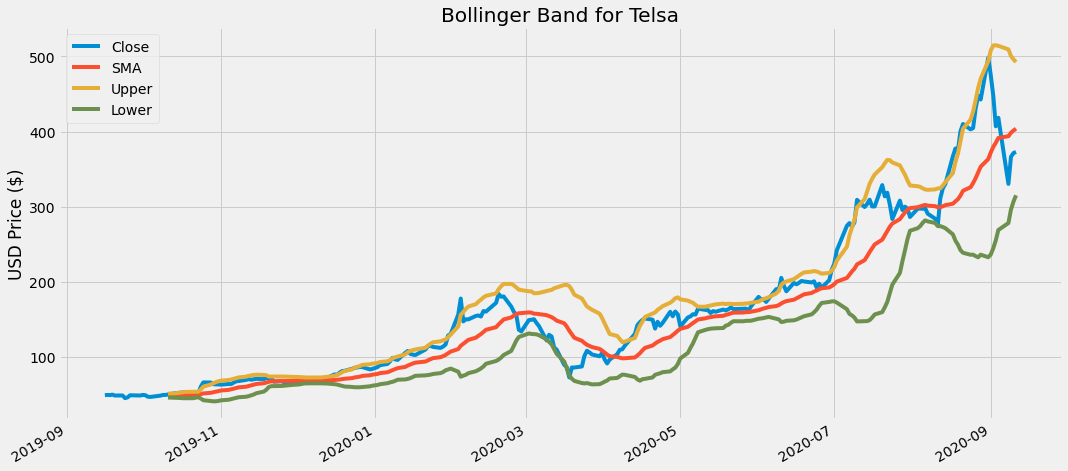

In [8]:
# Calculate the SMA, Standard Deviation, upper and lower bands

# Get the time period (20 day)
period = 20
# Calculate the SMA
df['SMA'] = df['Close'].rolling(window=period).mean()
# Get the standard deviation
df['STD'] = df['Close'].rolling(window=period).std()
# Calculate the Upper Bollinger Band
df['Upper'] = df['SMA'] + (df['STD'] * 2)
# Calculate the Lower Bollinger Band
df['Lower'] = df['SMA'] - (df['STD'] * 2)

# Create a list of columns to keep
column_list = ['Close', 'SMA', 'Upper', 'Lower']

# Plot the data
df[column_list].plot(figsize=(16,8))
plt.title('Bollinger Band for Telsa')
plt.ylabel('USD Price ($)')
plt.show()

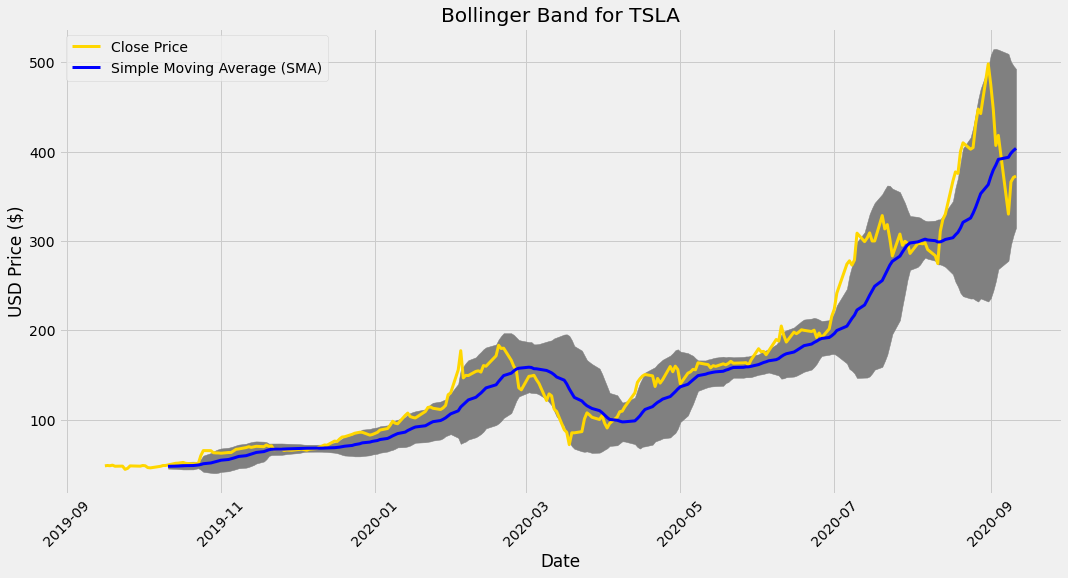

In [9]:
# Plot and shade the area btw the two Bollinger bands
# Get the figure and the figure size
fig = plt.figure(figsize=(16,8))
# add the subplot
ax = fig.add_subplot(1, 1, 1)
# Get the index values of the data frame
x_axis = df.index 
# Plot and shade the area
ax.fill_between(x_axis, df['Upper'], df['Lower'], color='grey')
# Plot the Close price and SMA
ax.plot(x_axis, df['Close'], color='gold', lw=3, label='Close Price')
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label='Simple Moving Average (SMA)')
# set the title and show the plot
ax.set_title('Bollinger Band for TSLA')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [10]:
# Create a new dataframe, excludes the first period (20 days)
new_df = df[period-1:]

new_df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
2019-10-11,2019-10-11,49.430000,50.216000,49.362000,49.577999,49.577999,42377000,48.042200,1.275922,50.594044,45.490355
2019-10-14,2019-10-14,49.580002,51.709999,49.425999,51.391998,51.391998,51025000,48.183700,1.477588,51.138876,45.228523
2019-10-15,2019-10-15,51.540001,52.000000,50.824001,51.577999,51.577999,32164000,48.314700,1.655304,51.625307,45.004092
2019-10-16,2019-10-16,51.478001,52.419998,51.383999,51.950001,51.950001,33420500,48.477300,1.843913,52.165126,44.789473
2019-10-17,2019-10-17,52.500000,52.956001,52.034000,52.394001,52.394001,23846500,48.631000,2.035969,52.702938,44.559061
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900,391.456598,61.366912,514.190421,268.722775
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700,393.781398,57.850371,509.482139,278.080657
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800,398.351498,51.189654,500.730806,295.972191
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600,401.370898,47.404111,496.179121,306.562676


In [15]:
# create function to get buy and sell signals
def get_signal(data):

    buy_signal = []
    sell_signal = []

    for i in range(len(data['Close'])):
        if data['Close'][i] > data['Upper'][i]: # Then sell it
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['Close'][i] < data['Lower'][i]: # Then buy it
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else: # Then ignore it
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    
    return (buy_signal, sell_signal)

In [16]:
# Create two new columns, one for buys and other for sells
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

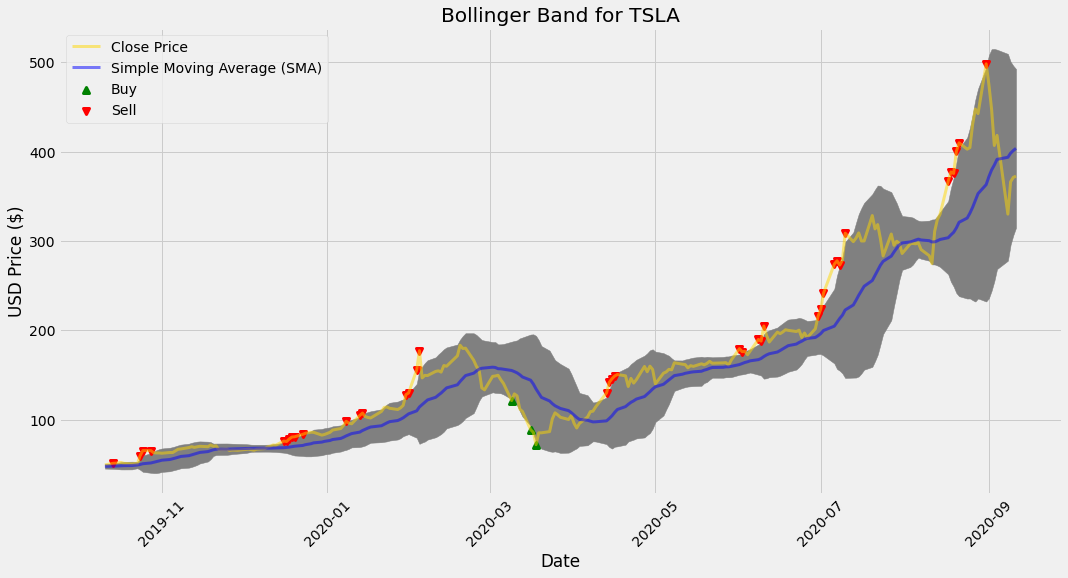

In [17]:
# Plot it all
# Get the figure and the figure size
fig = plt.figure(figsize=(16,8))
# add the subplot
ax = fig.add_subplot(1, 1, 1)
# Get the index values of the data frame
x_axis = new_df.index 
# Plot and shade the area
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color='grey')
# Plot the Close price and SMA
ax.plot(x_axis, new_df['Close'], color='gold', lw=3, label='Close Price', alpha=0.5)
ax.plot(x_axis, new_df['SMA'], color='blue', lw=3, label='Simple Moving Average (SMA)', alpha=0.5)
ax.scatter(x_axis, new_df['Buy'], color='green', lw=3, label='Buy', marker='^', alpha=1)
ax.scatter(x_axis, new_df['Sell'], color='red', lw=3, label='Sell', marker='v', alpha=1)
# set the title and show the plot
ax.set_title('Bollinger Band for TSLA')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()